In [306]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [307]:
df = pd.read_csv("wdbc.dataset", header = None) 

In [308]:
#Drop id coloumn and change M,B to 1,0
df.drop(columns = [0], axis = 1) 
df.iloc[:,1] = [1 if each == "M" else 0 for each in df.iloc[:,1]] 

In [309]:
#Divide to Y and X
y = df.iloc[:,1].values 
x_df = df.drop(columns = [0], axis = 1) 

In [310]:
#Normalisation
x = (x_df - np.min(x_df))/(np.max(x_df) - np.min(x_df)).values 

In [311]:
#Split to Train Val Test
from sklearn.model_selection import train_test_split 
x_train, x_rem, y_train, y_rem = train_test_split( x, y, test_size = 0.8, random_state = 42) 
x_test, x_val, y_test, y_val = train_test_split( x_rem, y_rem, test_size = 0.5, random_state = 42) 

x_train = x_train.T 
x_test = x_test.T 
x_val = x_val.T 
y_train = y_train.T 
y_train = y_train.T 
y_val = y_val.T 
TP = 0
FP = 0
FN = 0
TN = 0

In [312]:
#Bias and weights
def weights_bias(dimension): 
    w = np.full((dimension, 1), 0.01) 
    b = 1.0
    return w, b 

In [313]:
# Sigmoid Func
def sigmoid(z): 
    y_head = 1/(1 + np.exp(-z)) 
    return y_head 

In [314]:
#Calculate cost and update
def loss_func(w, b, x_train, y_train): 
    z = np.dot(w.T, x_train) + b 
    y_head = sigmoid(z) 
    loss =  y_train * np.log(y_head) + (1 - y_train) * np.log(1 - y_head) 
    # x_train.shape[1] m 
    cost = (np.sum(-loss)) / x_train.shape[1]
    # partial derivative
    do_weight = (np.dot(x_train, ( (y_head - y_train).T))) / x_train.shape[1] 
    do_bias = np.sum( y_head-y_train) / x_train.shape[1]
    wts_bias= {"do_weight": do_weight, "do_bias": do_bias} 
    return cost, wts_bias

In [315]:
#Learning the model
def update(w, b, x_train, y_train, alpha, epoch): 
    cost_list = [] 
    cost_list2 = [] 
    index = [] 
    # updating learning parameters
    for i in range(epoch): 
        # loss func 
        cost, wts_bias = loss_func(w, b, x_train, y_train) 
        cost_list.append(cost) 
        #update 
        w = w - alpha * wts_bias["do_weight"] 
        b = b - alpha * wts_bias["do_bias"] 
        if i % 10 == 0: 
            cost_list2.append(cost) 
            index.append(i) 
            #print ("Cost after iteration % i: % f" %(i, cost)) 
    # plot
    parameters = {"weight": w, "bias": b} 
    plt.plot(index, cost_list2) 
    #plt.xticks(index, rotation ='vertical') 
    plt.xlabel("Number of Iterarion") 
    plt.ylabel("Cost") 
    plt.show() 
    return parameters, wts_bias, cost_list 

In [316]:
#Predict Values
def predict(w, b, x_test): 
    # x_test is a input for loss
    z = sigmoid(np.dot(w.T, x_test)+b) 
    Y_prediction = np.zeros((1, x_test.shape[1])) 
    #print(z)
    
    for i in range(z.shape[1]): 
        if z[0, i] <= 0.5: 
            Y_prediction[0, i] = 0
        else: 
            Y_prediction[0, i] = 1
    return Y_prediction 

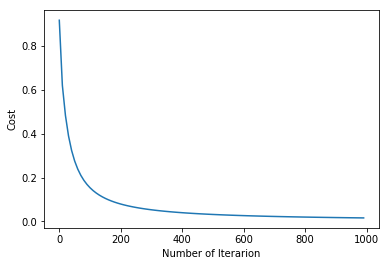

In [323]:
#Func Logistic
def logistic_regression(x_train, y_train, x_test, alpha, epoch): 
    
    dimension = x_train.shape[0] 
    w, b = weights_bias(dimension) 
    parameters, wts_bias, cost_list = update( w, b, x_train, y_train, alpha, epoch) 
    
    y_prediction_test = predict( parameters["weight"], parameters["bias"], x_test) 
    #y_prediction_train = predict( parameters["weight"], parameters["bias"], x_train) 
    return y_prediction_test
    
resul = logistic_regression(x_train, y_train, x_test, alpha = 0.3, epoch = 1000) 

In [324]:
for i in range(0, len(resul[0,])):
    if(resul[0,i] == 1):
        if(y_test[i] == 1):
            TP+=1
        else:
            FP+=1
    if(resul[0,i] == 0):
        if(y_test[i] == 0):
            TN+=1
        else:
            FN+=1
#Accuracy
acc = (TP+TN)/(TP+FP+TN+FN)
#Precision
prece = (TP)/(TP+FP)
#Recall
recall = (TP)/(TP+FN)
print("Accuracy:", acc*100)
print("Precision:", prece*100)
print("Recall:", recall*100)
            

Accuracy: 76.31578947368422
Precision: 65.66265060240963
Recall: 68.125
